<a href="https://colab.research.google.com/github/GeoKauko/TheNavySeals/blob/main/spectral_signatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect to the google drive if you use Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
!pip install rasterio -q

In [54]:
import zipfile
from glob import glob
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
zip_path = "/content/drive/MyDrive/SealNN/data.zip"
data_path = "/content/drive/MyDrive/SealNN/"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_path)

In [8]:
image_dir = '/content/drive/MyDrive/SealNN/data/pansharpened/train/images'
mask_dir = '/content/drive/MyDrive/SealNN/data/pansharpened/train/masks'

image_files = sorted(glob(os.path.join(image_dir, '*.tif')))
mask_files = sorted(glob(os.path.join(mask_dir, '*.tif')))

In [9]:
def extract_spectral_signatures(image_file, mask_file):
    # Read the image
    with rasterio.open(image_file) as src:
        image = src.read()

    # Read the mask
    with rasterio.open(mask_file) as src:
        mask = src.read(1)

    # Extract seal and environment pixels
    seal_pixels = image[:, mask == 1]
    environment_pixels = image[:, mask == 0]

    return seal_pixels, environment_pixels

# Initialize lists to store signatures
seal_signatures = []
environment_signatures = []

# Loop through the files and extract signatures
for image_file, mask_file in zip(image_files, mask_files):
    seal_pixels, environment_pixels = extract_spectral_signatures(image_file, mask_file)
    seal_signatures.append(seal_pixels)
    environment_signatures.append(environment_pixels)

# Convert lists to arrays
seal_signatures = np.concatenate(seal_signatures, axis=1)
environment_signatures = np.concatenate(environment_signatures, axis=1)

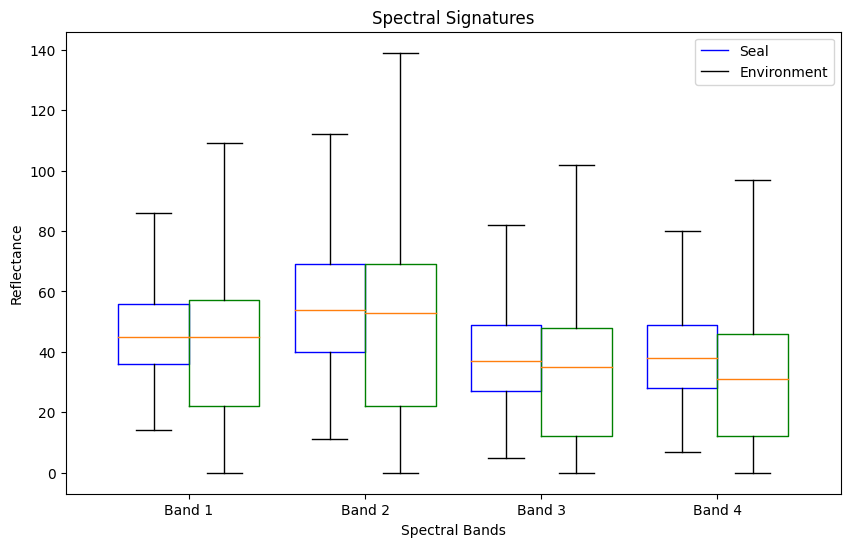

In [57]:
bands = range(1, seal_signatures.shape[0] + 1)
plt.figure(figsize=(10, 6))

# Plot box plots for seal_signatures with blue outline
plt.boxplot(seal_signatures.T, positions=np.array(bands) - 0.2, widths=0.4, showfliers=False, patch_artist=False,
            boxprops=dict(color='blue'))

# Plot box plots for environment_signatures with green outline
plt.boxplot(environment_signatures.T, positions=np.array(bands) + 0.2, widths=0.4, showfliers=False, patch_artist=False,
            boxprops=dict(color='green'))

plt.xticks(bands, [f'Band {b}' for b in bands])
plt.xlabel('Spectral Bands')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures')
plt.legend(['Seal', 'Environment'])

# Create custom legend handles with specified colors
legend_handles = [
    Line2D([0], [0], color='blue', lw=4, label='Seal'),
    Line2D([0], [0], color='green', lw=4, label='Environment')
]

plt.show()